In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('../10.3/Resources/GSPC.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [4]:
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-2.455155,0.000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.322326,-2.455155
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000,-1.835227,0.322326
2008-01-09,1390.250000,1409.189941,1378.699951,1409.130005,1409.130005,5351030000,1.362408,-1.835227
2008-01-10,1406.780029,1429.089966,1395.310059,1420.329956,1420.329956,5170490000,0.794813,1.362408


# Slice the data into Training and Testing data

In [5]:
train = df.loc['2008':'2012']

test = df.loc['2013']

In [6]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [7]:
X_train.head()

,Lagged_Return
Date,
2008-01-04,0.000000
2008-01-07,-2.455155
2008-01-08,0.322326
2008-01-09,-1.835227
2008-01-10,1.362408


In [8]:
y_train.head()

Date
2008-01-04   -2.455155
2008-01-07    0.322326
2008-01-08   -1.835227
2008-01-09    1.362408
2008-01-10    0.794813
Name: Return, dtype: float64

# Fit the model to the Training Data

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [11]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [12]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

In [13]:
Results.head(2)

,Return,Predicted Return
Date,,
2013-01-02,2.540342,-0.187786
2013-01-03,-0.208562,-0.288533


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

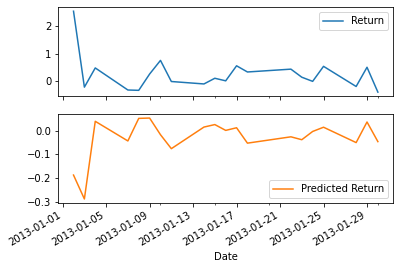

In [14]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.7035857696585405


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [16]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 1.6457477606131001
